# Covid-19 Data Analysis

In [1]:
# Importing the libraries required
import pandas as pd 
import numpy as np 
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt 

## Working with Covid19 dataset

In [2]:
# Importing covid19 dataset
corona_dataset_csv = pd.read_csv('Covid19_Confirmed_dataset.csv')
corona_dataset_csv.head(10)
#We will notice data is from 22 January 2020 to 30 April 2020

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


__Dataset for Covid 19 Confirmed Cases__

## Shape of the Dataframe

In [3]:
# Checking the shape of the dataframe
corona_dataset_csv.shape

(266, 104)

In [4]:
columns = corona_dataset_csv.columns
columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=104)

## Deleting Unnecessary Data

In [5]:
#Latitude and Longitude are not important features for us here
corona_dataset_csv.drop(["Lat",
                        "Long"],
                        axis=1,
                        #default value, annotation axis=0 which is equal to rows
                        inplace = True   #will change the corona dataset too
                        )

In [6]:
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


__Dataset After Deletion of Useless Data__

## Aggregation of rows by the country

In [7]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [8]:
corona_dataset_aggregated.head()
#After aggregation, the index of the df is the column at which we aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


__Aggregated Rows by Country__

In [9]:
corona_dataset_aggregated.shape
#we have 187 countries, 100 dates

(187, 100)

## Visualizing data related to a country for example India
Visualization always helps for better understanding of our data.

In [10]:
corona_dataset_aggregated.loc["India"]
#will return pandas series

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
4/26/20    27890
4/27/20    29451
4/28/20    31324
4/29/20    33062
4/30/20    34863
Name: India, Length: 100, dtype: int64

## Calculating a good measure 
We need to find a good measure reperestend as a number, describing the spread of the virus in a country.

Text(0, 0.5, 'No of Cases')

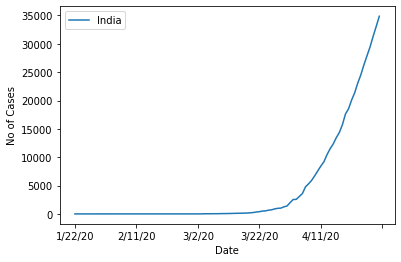

In [11]:
corona_dataset_aggregated.loc['India'].plot()
#will plot the values on different date
plt.legend()
plt.xlabel("Date")
plt.ylabel("No of Cases")

Text(0, 0.5, 'No of Cases')

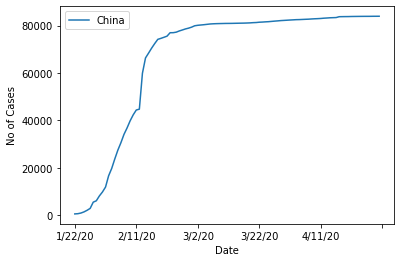

In [12]:
corona_dataset_aggregated.loc['China'].plot()
plt.legend()
plt.xlabel("Date")
plt.ylabel("No of Cases")

Text(0, 0.5, 'No of Cases')

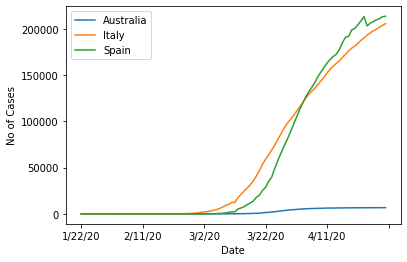

In [13]:
corona_dataset_aggregated.loc['Australia'].plot()
corona_dataset_aggregated.loc['Italy'].plot()
corona_dataset_aggregated.loc['Spain'].plot()
plt.legend()
plt.xlabel("Date")
plt.ylabel("No of Cases")

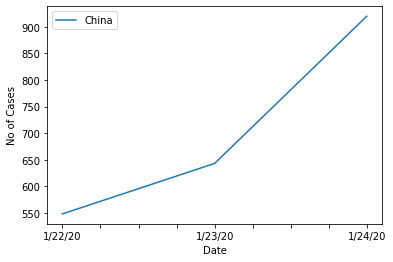

In [14]:
#Spread of the virus in China for the first 3 dates only
corona_dataset_aggregated.loc['China'][:3].plot()
plt.xlabel("Date")
plt.ylabel("No of Cases")
plt.legend()

In the 1st 24 hrs, an increase in case (550 to 650) by 100.

In the 2nd 24 hrs, an increase (650 to 900) by 250.

We want to find a measure for new cases, so either say average or maximum number of new cases.

## Calculating the first derivative of the curve

Text(0, 0.5, 'Infection Rate')

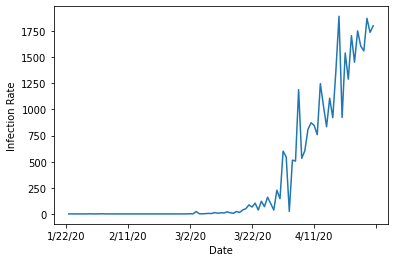

In [15]:
corona_dataset_aggregated.loc["India"].diff().plot()
plt.xlabel("Date")
plt.ylabel("Infection Rate")

This plot shows us the change in infection rate day by day and what we are looking for is the maximum number.

## Finding maxmimum infection rate for India

In [16]:
corona_dataset_aggregated.loc["India"].diff().max()
#In only 24 hrs, the difference was 1893

1893.0

In [17]:
corona_dataset_aggregated.loc["Italy"].diff().max()
#In only 24 hrs, the difference was 6557

6557.0

In [18]:
corona_dataset_aggregated.loc["China"].diff().max()
#In only 24 hrs, the difference was 15136

15136.0

In [19]:
corona_dataset_aggregated.loc["Spain"].diff().max()
#In only 24 hrs, the difference was 9630

9630.0

## Finding maximum infection rate for all of the countries

In [20]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries :
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
max_infection_rates

[232.0,
 34.0,
 199.0,
 43.0,
 5.0,
 6.0,
 291.0,
 134.0,
 497.0,
 1321.0,
 105.0,
 7.0,
 301.0,
 641.0,
 12.0,
 1485.0,
 2454.0,
 4.0,
 19.0,
 1.0,
 104.0,
 92.0,
 7.0,
 7502.0,
 26.0,
 137.0,
 41.0,
 21.0,
 6.0,
 45.0,
 31.0,
 203.0,
 2778.0,
 31.0,
 21.0,
 1138.0,
 15136.0,
 353.0,
 1.0,
 57.0,
 81.0,
 37.0,
 113.0,
 96.0,
 63.0,
 58.0,
 381.0,
 391.0,
 99.0,
 156.0,
 5.0,
 371.0,
 11536.0,
 269.0,
 32.0,
 130.0,
 7.0,
 134.0,
 20.0,
 9.0,
 5.0,
 267.0,
 26849.0,
 38.0,
 5.0,
 42.0,
 6933.0,
 403.0,
 156.0,
 6.0,
 68.0,
 167.0,
 132.0,
 12.0,
 10.0,
 3.0,
 72.0,
 210.0,
 99.0,
 1893.0,
 436.0,
 3186.0,
 91.0,
 1515.0,
 1131.0,
 6557.0,
 52.0,
 1161.0,
 40.0,
 264.0,
 29.0,
 851.0,
 289.0,
 300.0,
 69.0,
 3.0,
 48.0,
 61.0,
 17.0,
 13.0,
 21.0,
 90.0,
 234.0,
 7.0,
 14.0,
 10.0,
 235.0,
 190.0,
 58.0,
 52.0,
 2.0,
 41.0,
 1425.0,
 222.0,
 12.0,
 13.0,
 30.0,
 281.0,
 19.0,
 3.0,
 14.0,
 1346.0,
 89.0,
 2.0,
 69.0,
 208.0,
 107.0,
 386.0,
 144.0,
 1292.0,
 357.0,
 5.0,
 27.0,
 3683.0,

In [21]:
corona_dataset_aggregated["max_infection_rates"] = max_infection_rates

In [22]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


__Maximum Infection Rate Table__

## Creating a new dataframe with only needed column 

In [23]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rates"])

In [24]:
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


## Working with World Happiness Report dataset

In [25]:
# Importing the dataset
happiness_report_csv = pd.read_csv("worldwide_happiness_report.csv")

In [26]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


__Dataset for World Happiness Report__

## Deleting Unnecessary Data

In [27]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [28]:
happiness_report_csv.drop(useless_cols, axis=1, inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


__Dataset After Deletion of Useless Data__

## Changing the indices of the dataframe

In [29]:
happiness_report_csv.set_index("Country or region", inplace=True)

In [30]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


## Now let's join two dataset we have prepared  

#### Corona Dataset :

In [31]:
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [32]:
corona_data.shape    #Tuple with 187 countries

(187, 1)

#### World happiness Report Dataset :

In [33]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [34]:
happiness_report_csv.shape    #156 countries, less than corona data

(156, 4)

In [35]:
#Inner join
data = corona_data.join(happiness_report_csv,
                how = "inner"    #method/type of join
                )
data.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


## Correlation matrix

In [36]:
data.corr()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


There is +ve correlation between max_infection-rate and all other features.

## Visualization of the results
Our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis.

In [37]:
data.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


## Plotting GDP vs maximum Infection rate

Text(0, 0.5, 'max_infection_rates')

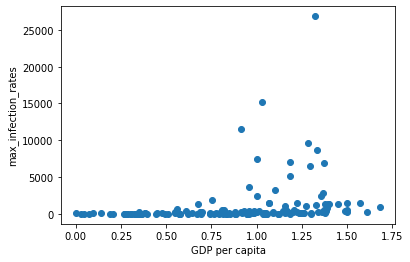

In [38]:
x = data["GDP per capita"]
y = data["max_infection_rates"]
plt.scatter(x,y)
plt.xlabel("GDP per capita")
plt.ylabel("max_infection_rates")
#We can see the values need different scaling

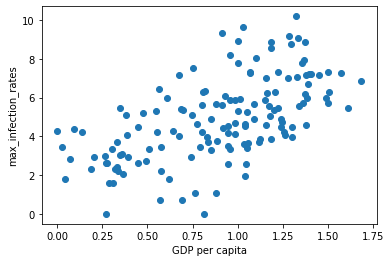

In [39]:
#Will apply log scaling to y
x = data["GDP per capita"]
y = data["max_infection_rates"]
plt.xlabel("GDP per capita")
plt.ylabel("max_infection_rates")
plt.scatter(x,np.log(y))

#Now we can see +ve correlation

<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rates'>

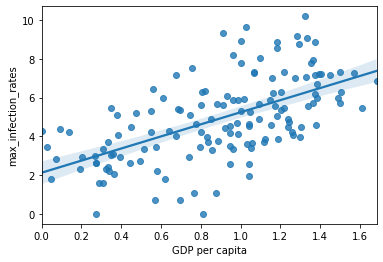

In [40]:
#RegPlot
x = data["GDP per capita"]
y = data["max_infection_rates"]

sns.regplot(x,np.log(y))

#Line fitted, +ve slope seen

## Plotting Social support vs maximum Infection rate

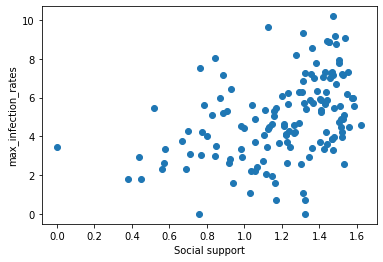

In [41]:
x = data["Social support"]
y = data["max_infection_rates"]
plt.xlabel("Social support")
plt.ylabel("max_infection_rates")
plt.scatter(x,np.log(y))

<AxesSubplot:xlabel='Social support', ylabel='max_infection_rates'>

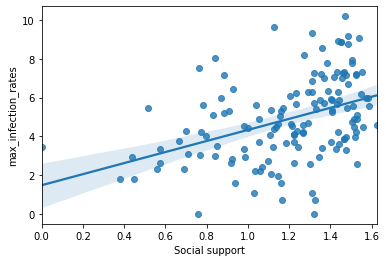

In [42]:
x = data["Social support"]
y = data["max_infection_rates"]

sns.regplot(x,np.log(y))

## Plotting Healthy life expectancy vs maximum Infection rate

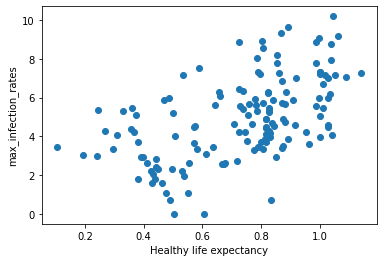

In [43]:
x = data["Healthy life expectancy"]
y = data["max_infection_rates"]
plt.xlabel("Healthy life expectancy")
plt.ylabel("max_infection_rates")
plt.scatter(x,np.log(y))

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection_rates'>

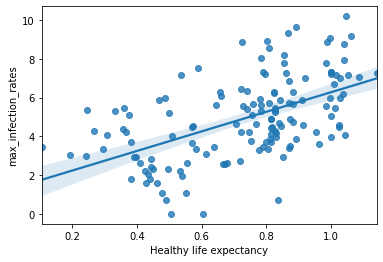

In [44]:
x = data["Healthy life expectancy"]
y = data["max_infection_rates"]

sns.regplot(x,np.log(y))

## Plotting Freedom to make life choices vs maximum Infection rate

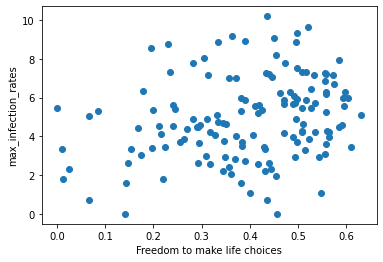

In [45]:
x = data["Freedom to make life choices"]
y = data["max_infection_rates"]
plt.xlabel("Freedom to make life choices")
plt.ylabel("max_infection_rates")
plt.scatter(x,np.log(y))

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rates'>

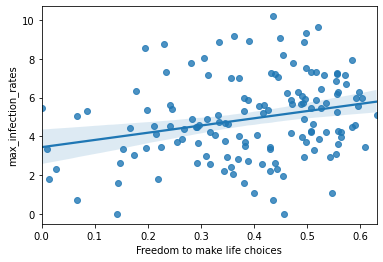

In [46]:
x = data["Freedom to make life choices"]
y = data["max_infection_rates"]

sns.regplot(x,np.log(y))